In [46]:
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit

### Creating statevector using qiskit

In [10]:
u = Statevector([1/np.sqrt(2), 1/np.sqrt(2)])
v = Statevector([(1+2.j)/3, -2/3])
w = Statevector([1/3, 2/3])

### Different ways of displaying vectors

In [5]:
display(u.draw('latex'))
display(v.draw('text'))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

### Measuring the state of vector v

In [25]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

### Simulating the measurement of v's state

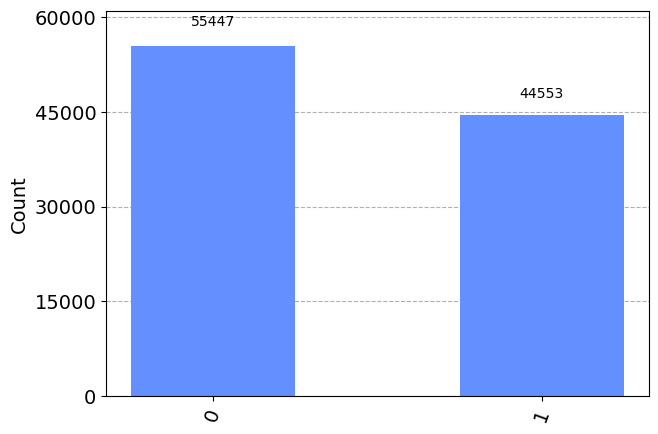

[P(0), P(1)] given by


array([0.55555556, 0.44444444])

In [40]:
# Simulation
statistics = v.sample_counts(100000)
display(plot_histogram(statistics))

# Actual probabilities
print('[P(0), P(1)] given by')
display(v.probabilities())

### Operators/Matrix Multiplication

In [43]:
# Defining key operators
# X, Y, Z: Pauli Matrices
# H: Hadamard Operator
# S, T: Phase Operators
X = Operator([ [0,1],[1,0] ])
Y = Operator([ [0,-1.j],[1.j,0] ])
Z = Operator([ [1,0],[0,-1] ])
H = Operator([ [1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)] ])
S = Operator([ [1,0],[0,1.j] ])
T = Operator([ [1,0],[0,(1+1.j)/np.sqrt(2)] ])

In [58]:
# Defining statevector as |0>
v = Statevector([0, 1j])

# Applying the linear transformation ZTHTH to vector v 
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)

v.draw('latex')

<IPython.core.display.Latex object>

### Creating circuit that acts on one qubit

In [47]:
# Create a circuit with one qubit
circuit = QuantumCircuit(1)

# Create a sequence of gates which all act on the qubit with index 0
circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()

┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

In [64]:
ket = Statevector([0, 1j])
print('Original ket:')
display(ket.draw('latex'))

print('Post transformation ket:')
evolved_ket = ket.evolve(circuit)
display(evolved_ket.draw('latex'))

Original ket:


<IPython.core.display.Latex object>

Post transformation ket:


<IPython.core.display.Latex object>

### Simulating the process of taking $i |1>$ and having it go through the circuit before and then measuring the state of said qubit (this whole process is repeated 10000 times)

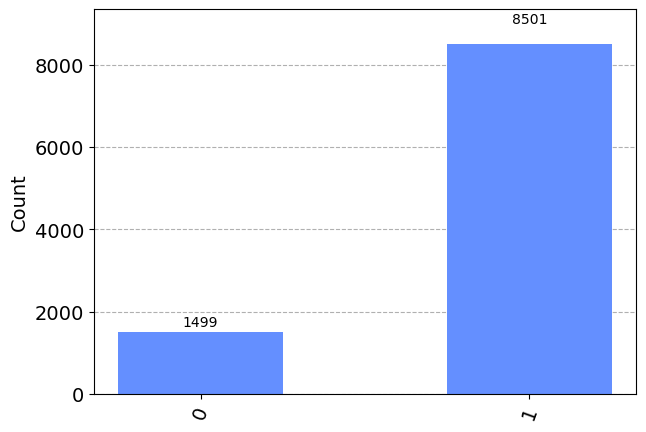

In [66]:
# Simulating measurement of the original state after undergoing the circuit before 10000 times
stats = evolved_ket.sample_counts(10000)
display(plot_histogram(stats))